[View in Colaboratory](https://colab.research.google.com/github/PGrabinski/KerasTutorial/blob/master/Chapter5/Chapter5.ipynb)

# Chapter 5: Computer Vision
### from *Deep Learning with Python* by Francois Chollet

This chapter cointains ideas mostly conected with Convolution Neural Network:
1. First CNN with example of MNIST dataset
1. Training a CNN from scratch with a small dataset
1. Using a pretrained network
1. Data augmentation
1. Visualizing what Convnets actually learn

## First CNN with MNIST

Simple CNN on the MNIST dataset.

In [112]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras import layers
from keras import models

(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

x_train = train_data.reshape(len(train_data),28,28,1).astype('float32') / 255
y_train = to_categorical(train_labels)

x_test = test_data.reshape(len(test_data),28,28,1).astype('float32') / 255
y_test = to_categorical(test_labels)

modelMNIST = models.Sequential()
modelMNIST.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
modelMNIST.add(layers.MaxPooling2D((2,2)))
modelMNIST.add(layers.Conv2D(64, (3,3), activation='relu'))
modelMNIST.add(layers.MaxPooling2D((2,2)))
modelMNIST.add(layers.Conv2D(64, (3,3), activation='relu'))
modelMNIST.add(layers.Flatten())
modelMNIST.add(layers.Dense(64, activation='relu'))
modelMNIST.add(layers.Dense(10, activation='softmax'))

modelMNIST.compile( optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
modelMNIST.fit(x_train,y_train,epochs=5, batch_size=64)
test_loss, test_acc = modelMNIST.evaluate(x_test, y_test)
print(test_acc)
model.summary()


Epoch 1/5
60000/60000 [==============================] - 12s 205us/step - loss: 0.1766 - acc: 0.9450
Epoch 2/5
60000/60000 [==============================] - 12s 195us/step - loss: 0.0452 - acc: 0.9858
Epoch 3/5
38016/60000 [==================>...........] - ETA: 4s - loss: 0.0322 - acc: 0.9900

60000/60000 [==============================] - 12s 197us/step - loss: 0.0310 - acc: 0.9904
Epoch 4/5
60000/60000 [==============================] - 12s 195us/step - loss: 0.0239 - acc: 0.9919
Epoch 5/5
55616/60000 [==========================>...] - ETA: 0s - loss: 0.0179 - acc: 0.9945

10000/10000 [==============================] - 1s 144us/step
0.9894
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


## CNN from scratch witha small dataset
Teaching a network from scratch on Cats vs Dogs discrimination task with a small dataset. The data is downloaded and set in the next section.

In [114]:
from keras import models
from keras import layers
from keras import optimizers

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(64, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Conv2D(128, (3,3), activation='relu'))
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.summary()
model1.compile(optimizer = optimizers.RMSprop(lr=1e-4), loss = 'binary_crossentropy', metrics=['acc'])
history1 = model1.fit_generator(trainGen, steps_per_epoch = 100, epochs = 30, validation_data=valGen, validation_steps = 50)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 15, 15, 128)       147584    
__________

100/100 [==============================] - 23s 235ms/step - loss: 0.6932 - acc: 0.5285 - val_loss: 0.6954 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 20s 205ms/step - loss: 0.6840 - acc: 0.5595 - val_loss: 0.6642 - val_acc: 0.6230
Epoch 3/30
100/100 [==============================] - 20s 205ms/step - loss: 0.6715 - acc: 0.5960 - val_loss: 0.6577 - val_acc: 0.5960
Epoch 4/30
 82/100 [=======================>......] - ETA: 2s - loss: 0.6591 - acc: 0.6030

100/100 [==============================] - 21s 206ms/step - loss: 0.6558 - acc: 0.6070 - val_loss: 0.6323 - val_acc: 0.6340
Epoch 5/30
100/100 [==============================] - 21s 205ms/step - loss: 0.6422 - acc: 0.6360 - val_loss: 0.6031 - val_acc: 0.6740
Epoch 6/30
100/100 [==============================] - 20s 200ms/step - loss: 0.6338 - acc: 0.6435 - val_loss: 0.5984 - val_acc: 0.6690
Epoch 7/30
 88/100 [=========================>....] - ETA: 1s - loss: 0.6136 - acc: 0.6489

100/100 [==============================] - 20s 201ms/step - loss: 0.6176 - acc: 0.6480 - val_loss: 0.5881 - val_acc: 0.6800
Epoch 8/30
100/100 [==============================] - 20s 198ms/step - loss: 0.6097 - acc: 0.6710 - val_loss: 0.5659 - val_acc: 0.6940
Epoch 9/30
100/100 [==============================] - 20s 202ms/step - loss: 0.6000 - acc: 0.6815 - val_loss: 0.5624 - val_acc: 0.7030
Epoch 10/30
 88/100 [=========================>....] - ETA: 1s - loss: 0.5956 - acc: 0.6830

100/100 [==============================] - 21s 208ms/step - loss: 0.5922 - acc: 0.6870 - val_loss: 0.5842 - val_acc: 0.6780
Epoch 11/30
100/100 [==============================] - 20s 199ms/step - loss: 0.5854 - acc: 0.6965 - val_loss: 0.5936 - val_acc: 0.6750
Epoch 12/30
100/100 [==============================] - 20s 202ms/step - loss: 0.5835 - acc: 0.6905 - val_loss: 0.5496 - val_acc: 0.7180
Epoch 13/30
 86/100 [========================>.....] - ETA: 2s - loss: 0.5689 - acc: 0.7070

100/100 [==============================] - 20s 201ms/step - loss: 0.5678 - acc: 0.7070 - val_loss: 0.5697 - val_acc: 0.7080
Epoch 14/30
100/100 [==============================] - 20s 203ms/step - loss: 0.5760 - acc: 0.6880 - val_loss: 0.5319 - val_acc: 0.7220
Epoch 15/30
100/100 [==============================] - 20s 201ms/step - loss: 0.5693 - acc: 0.6990 - val_loss: 0.5163 - val_acc: 0.7450
Epoch 16/30
 89/100 [=========================>....] - ETA: 1s - loss: 0.5680 - acc: 0.7174

100/100 [==============================] - 20s 201ms/step - loss: 0.5637 - acc: 0.7190 - val_loss: 0.5437 - val_acc: 0.7090
Epoch 17/30
100/100 [==============================] - 21s 208ms/step - loss: 0.5530 - acc: 0.7110 - val_loss: 0.5070 - val_acc: 0.7430
Epoch 18/30
100/100 [==============================] - 20s 204ms/step - loss: 0.5545 - acc: 0.7130 - val_loss: 0.5477 - val_acc: 0.7110
Epoch 19/30
 88/100 [=========================>....] - ETA: 1s - loss: 0.5428 - acc: 0.7210

100/100 [==============================] - 20s 204ms/step - loss: 0.5367 - acc: 0.7220 - val_loss: 0.5780 - val_acc: 0.7040
Epoch 20/30
100/100 [==============================] - 20s 204ms/step - loss: 0.5457 - acc: 0.7270 - val_loss: 0.5224 - val_acc: 0.7290
Epoch 21/30
100/100 [==============================] - 20s 201ms/step - loss: 0.5425 - acc: 0.7275 - val_loss: 0.4976 - val_acc: 0.7470
Epoch 22/30
 88/100 [=========================>....] - ETA: 1s - loss: 0.5430 - acc: 0.7307

100/100 [==============================] - 20s 202ms/step - loss: 0.5371 - acc: 0.7340 - val_loss: 0.5191 - val_acc: 0.7360
Epoch 23/30
100/100 [==============================] - 20s 205ms/step - loss: 0.5308 - acc: 0.7405 - val_loss: 0.5270 - val_acc: 0.7330
Epoch 24/30
100/100 [==============================] - 21s 208ms/step - loss: 0.5291 - acc: 0.7330 - val_loss: 0.4969 - val_acc: 0.7560
Epoch 25/30
 85/100 [========================>.....] - ETA: 2s - loss: 0.5188 - acc: 0.7482

100/100 [==============================] - 20s 202ms/step - loss: 0.5262 - acc: 0.7400 - val_loss: 0.5079 - val_acc: 0.7410
Epoch 26/30
100/100 [==============================] - 20s 199ms/step - loss: 0.5195 - acc: 0.7440 - val_loss: 0.4922 - val_acc: 0.7520
Epoch 27/30
100/100 [==============================] - 20s 199ms/step - loss: 0.5123 - acc: 0.7465 - val_loss: 0.5592 - val_acc: 0.7100
Epoch 28/30
 87/100 [=========================>....] - ETA: 2s - loss: 0.5180 - acc: 0.7420

100/100 [==============================] - 20s 199ms/step - loss: 0.5113 - acc: 0.7470 - val_loss: 0.4844 - val_acc: 0.7610
Epoch 29/30
100/100 [==============================] - 20s 202ms/step - loss: 0.5038 - acc: 0.7430 - val_loss: 0.4990 - val_acc: 0.7470
Epoch 30/30
100/100 [==============================] - 20s 201ms/step - loss: 0.5001 - acc: 0.7570 - val_loss: 0.4901 - val_acc: 0.7600


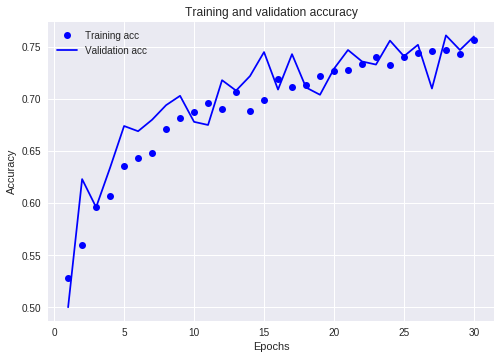

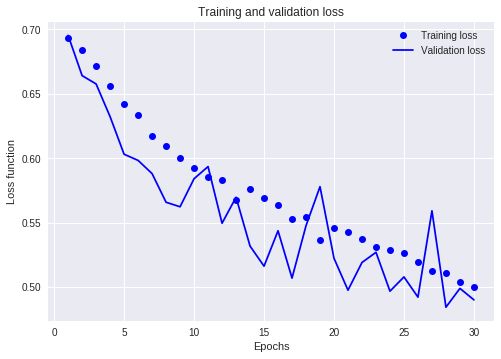

In [115]:
import matplotlib.pyplot as plt

acc1 = history1.history['acc']
val_acc1 = history1.history['val_acc']
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(1, 30 + 1)

plt.plot(epochs1, acc1, 'bo', label='Training acc')
plt.plot(epochs1, val_acc1, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs1, loss1, 'bo', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [0]:
model1.save('5_2.h5')
file5 = drive.CreateFile()
file5.SetContentFile('5_2.h5')
file5.Upload()

## Using a pretrained CNN
Now, I import the VGG16 network (its weights). It is a network trained on the fameous ImageNet dataset.
I used only its basis (hence the *include_top=False* parameter) as I want to use it only to extract features from my network and train my own classification model.

In [0]:
from keras.applications import VGG16
conv = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

I store the dataset of dogs and cats on my Google Drive. So to use it, I download it via PyDrive. Then, I create appropiate folders and download the files into them.

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
train_cats = drive.ListFile({'q':"'1E8nqrg9gGSCKQO5CMNYTe43am7vHwRhe' in parents and trashed=false"}).GetList()
train_dogs = drive.ListFile({'q':"'1sw6qdcBUUUTAsCFy92GiBCl8r69ygfoF' in parents and trashed=false"}).GetList()
val_cats = drive.ListFile({'q':"'1ssiJ-SBEDIz5bpSyJG6ujbVButtFjHfV' in parents and trashed=false"}).GetList()
val_dogs = drive.ListFile({'q':"'1qhifSiBV2UkrbCsX0xtjC3W35KO0jxoZ' in parents and trashed=false"}).GetList()
test_cats = drive.ListFile({'q':"'1hp3lRCKqK2n3HxC_oOvAjMcSWC1IPObP' in parents and trashed=false"}).GetList()
test_dogs = drive.ListFile({'q':"'12cnoYqrhzwQjJyiRuhZw_UZYcHVYhScN' in parents and trashed=false"}).GetList()


In [94]:
!mkdir test
!mkdir test/dogs
!mkdir test/cats
!mkdir train
!mkdir train/dogs
!mkdir train/cats
!mkdir val
!mkdir val/dogs
!mkdir val/cats

mkdir: cannot create directory ‘test’: File exists
mkdir: cannot create directory ‘test/dogs’: File exists
mkdir: cannot create directory ‘test/cats’: File exists
mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘train/dogs’: File exists
mkdir: cannot create directory ‘train/cats’: File exists
mkdir: cannot create directory ‘val’: File exists
mkdir: cannot create directory ‘val/dogs’: File exists
mkdir: cannot create directory ‘val/cats’: File exists


In [0]:
def downloadFilesFromDriveByFolderFilesList(fileList, folder):
  i = 0
  for fileData in fileList:
    file = drive.CreateFile({'id':fileData['id']})
    file.GetContentFile('{}/{}.jpg'.format(folder,i))
    i+=1

In [0]:
downloadFilesFromDriveByFolderFilesList(train_cats, 'train/cats')
downloadFilesFromDriveByFolderFilesList(train_dogs, 'train/dogs')
downloadFilesFromDriveByFolderFilesList(test_cats, 'test/cats')
downloadFilesFromDriveByFolderFilesList(test_dogs, 'test/dogs')
downloadFilesFromDriveByFolderFilesList(val_cats, 'val/cats')
downloadFilesFromDriveByFolderFilesList(val_dogs, 'val/dogs')

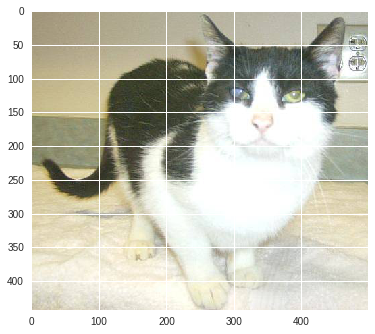

In [97]:
import matplotlib.image as mpimg

img = mpimg.imread('train/cats/0.jpg')
plt.imshow(img)

There are two ways to use the imported network.We can use it just for data extraction - transforming images into a form where important geometrical features are highlighted and saving them as new files for processing with an another network, but a better approach is to add a new classification model on top of it - it will learn how to distinguish classes basing on the features extracted by the pretrained network.

Important adventage of this approach is that we can use the **data augmentation** - we simply transform the images geometrically by shifting, rotating, fliping or sheering. This lets the network to learn the features of the classes not their placement on the image.

The new network consists of:
1. Pretrained network
1. Flattening layer
1. Dense layer of 256 units with sigmoid activation function - layer for connecting features and classes
1. Danse layer of a unit with sigmoid activation function - giving proability of the class

I define generators for train and test data. The train one gives also the augmentation, but the test one should not as we want to evaluate it on valid data.

In [0]:
from keras import models, layers

model = models.Sequential()
conv.trainable = False
model.add(conv)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [99]:
from keras.preprocessing.image import ImageDataGenerator
import os

trainDatagen = ImageDataGenerator( rescale = 1./255, rotation_range = 40, width_shift_range = 0.2,
                                  height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2,
                                  horizontal_flip=True, fill_mode = 'nearest')

testDatagen = ImageDataGenerator( rescale = 1./255 )

base_dir = '/content'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

trainGen = trainDatagen.flow_from_directory(train_dir, target_size = (150, 150),
                                            batch_size = 20, class_mode = 'binary') 

valGen = testDatagen.flow_from_directory(val_dir, target_size = (150, 150),
                                            batch_size = 20, class_mode = 'binary') 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Model is compiled with an optimizer with a small learning rate and appropiate loss fucntion and metric.

In [100]:
from keras import optimizers

model.compile( optimizer = optimizers.RMSprop(lr=2e-5), metrics = ['acc'], loss='binary_crossentropy')

history = model.fit_generator(trainGen, steps_per_epoch=100, epochs=30, validation_data=valGen, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 30s 295ms/step - loss: 0.6117 - acc: 0.6670 - val_loss: 0.4567 - val_acc: 0.8290
Epoch 2/30
100/100 [==============================] - 27s 268ms/step - loss: 0.4883 - acc: 0.7865 - val_loss: 0.3674 - val_acc: 0.8690
Epoch 3/30
100/100 [==============================] - 27s 266ms/step - loss: 0.4274 - acc: 0.8105 - val_loss: 0.3294 - val_acc: 0.8790
Epoch 4/30
 64/100 [==================>...........] - ETA: 6s - loss: 0.4090 - acc: 0.8258

100/100 [==============================] - 27s 267ms/step - loss: 0.4029 - acc: 0.8210 - val_loss: 0.3026 - val_acc: 0.8810
Epoch 5/30
100/100 [==============================] - 27s 266ms/step - loss: 0.3933 - acc: 0.8180 - val_loss: 0.2950 - val_acc: 0.8810
Epoch 6/30
100/100 [==============================] - 27s 267ms/step - loss: 0.3627 - acc: 0.8370 - val_loss: 0.2968 - val_acc: 0.8710
Epoch 7/30
 83/100 [=======================>......] - ETA: 3s - loss: 0.3502 - acc: 0.8530

100/100 [==============================] - 27s 265ms/step - loss: 0.3504 - acc: 0.8510 - val_loss: 0.2753 - val_acc: 0.8980
Epoch 8/30
100/100 [==============================] - 26s 264ms/step - loss: 0.3499 - acc: 0.8465 - val_loss: 0.2815 - val_acc: 0.8790
Epoch 9/30
100/100 [==============================] - 27s 266ms/step - loss: 0.3514 - acc: 0.8410 - val_loss: 0.2636 - val_acc: 0.9010
Epoch 10/30
 85/100 [========================>.....] - ETA: 2s - loss: 0.3359 - acc: 0.8494

100/100 [==============================] - 27s 266ms/step - loss: 0.3346 - acc: 0.8525 - val_loss: 0.2620 - val_acc: 0.8960
Epoch 11/30
100/100 [==============================] - 26s 264ms/step - loss: 0.3270 - acc: 0.8510 - val_loss: 0.2579 - val_acc: 0.9000
Epoch 12/30
100/100 [==============================] - 26s 264ms/step - loss: 0.3195 - acc: 0.8590 - val_loss: 0.2573 - val_acc: 0.8950
Epoch 13/30
 85/100 [========================>.....] - ETA: 2s - loss: 0.3265 - acc: 0.8559

100/100 [==============================] - 26s 261ms/step - loss: 0.3259 - acc: 0.8555 - val_loss: 0.2533 - val_acc: 0.8950
Epoch 14/30
100/100 [==============================] - 26s 262ms/step - loss: 0.3138 - acc: 0.8660 - val_loss: 0.2527 - val_acc: 0.8960
Epoch 15/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3208 - acc: 0.8605 - val_loss: 0.2482 - val_acc: 0.9050
Epoch 16/30
 85/100 [========================>.....] - ETA: 2s - loss: 0.3029 - acc: 0.8706

100/100 [==============================] - 26s 260ms/step - loss: 0.3110 - acc: 0.8680 - val_loss: 0.2457 - val_acc: 0.9090
Epoch 17/30
100/100 [==============================] - 26s 261ms/step - loss: 0.3200 - acc: 0.8605 - val_loss: 0.2478 - val_acc: 0.8980
Epoch 18/30
100/100 [==============================] - 26s 263ms/step - loss: 0.3002 - acc: 0.8755 - val_loss: 0.2393 - val_acc: 0.9050
Epoch 19/30
 84/100 [========================>.....] - ETA: 3s - loss: 0.3045 - acc: 0.8690

100/100 [==============================] - 26s 262ms/step - loss: 0.3011 - acc: 0.8695 - val_loss: 0.2431 - val_acc: 0.8980
Epoch 20/30
100/100 [==============================] - 26s 260ms/step - loss: 0.2983 - acc: 0.8720 - val_loss: 0.2378 - val_acc: 0.9020
Epoch 21/30
100/100 [==============================] - 26s 255ms/step - loss: 0.2901 - acc: 0.8730 - val_loss: 0.2463 - val_acc: 0.9040
Epoch 22/30
 79/100 [======================>.......] - ETA: 3s - loss: 0.3130 - acc: 0.8601

100/100 [==============================] - 26s 257ms/step - loss: 0.3101 - acc: 0.8605 - val_loss: 0.2382 - val_acc: 0.9040
Epoch 23/30
100/100 [==============================] - 26s 258ms/step - loss: 0.3131 - acc: 0.8690 - val_loss: 0.2358 - val_acc: 0.9060
Epoch 24/30
100/100 [==============================] - 26s 259ms/step - loss: 0.2865 - acc: 0.8775 - val_loss: 0.2365 - val_acc: 0.9050
Epoch 25/30
 79/100 [======================>.......] - ETA: 3s - loss: 0.3038 - acc: 0.8741

100/100 [==============================] - 26s 261ms/step - loss: 0.3070 - acc: 0.8710 - val_loss: 0.2385 - val_acc: 0.9050
Epoch 26/30
100/100 [==============================] - 26s 256ms/step - loss: 0.2870 - acc: 0.8710 - val_loss: 0.2421 - val_acc: 0.9040
Epoch 27/30
100/100 [==============================] - 26s 259ms/step - loss: 0.2969 - acc: 0.8725 - val_loss: 0.2383 - val_acc: 0.9040
Epoch 28/30
 79/100 [======================>.......] - ETA: 4s - loss: 0.2832 - acc: 0.8861

100/100 [==============================] - 26s 265ms/step - loss: 0.2855 - acc: 0.8820 - val_loss: 0.2430 - val_acc: 0.9010
Epoch 29/30
100/100 [==============================] - 26s 261ms/step - loss: 0.2823 - acc: 0.8780 - val_loss: 0.2385 - val_acc: 0.9060
Epoch 30/30
100/100 [==============================] - 26s 264ms/step - loss: 0.2954 - acc: 0.8685 - val_loss: 0.2356 - val_acc: 0.9070


Now, I plot accuracy and loss function of the model.

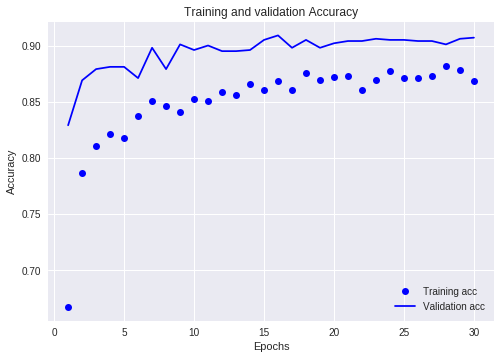

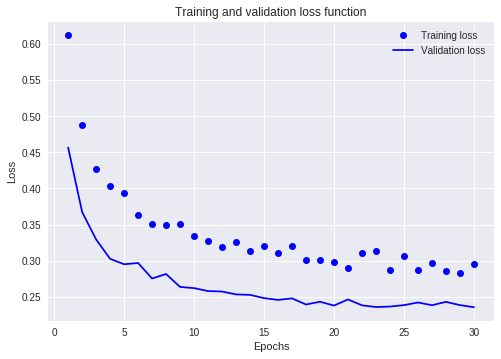

In [101]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

What is interesting, the validation accuracy is higher than the training one. Below, there is an evaluation of the model with the test dataset.

In [102]:
testGen = testDatagen.flow_from_directory(test_dir, target_size = (150, 150),
                                            batch_size = 20, class_mode = 'binary')
model.evaluate_generator(testGen)

Found 1001 images belonging to 2 classes.


[0.24655644541288113, 0.8961038975329785]

#### Fine-tuning
To further improve the accuracy we can unfreeze the end layers of the pretrained network. This network is pretrained for discrimination of many classes. We have only two, thus the set of important features may be a little bit different.

In [105]:
model2 = models.Sequential()
model2.add(conv)
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'], loss='binary_crossentropy')
history2 = model2.fit_generator(trainGen, steps_per_epoch=100, epochs=100, validation_data=valGen, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 29s 287ms/step - loss: 0.6472 - acc: 0.6310 - val_loss: 0.5475 - val_acc: 0.7390
Epoch 2/100
100/100 [==============================] - 26s 265ms/step - loss: 0.5583 - acc: 0.7325 - val_loss: 0.4661 - val_acc: 0.7920
Epoch 3/100
100/100 [==============================] - 26s 260ms/step - loss: 0.5062 - acc: 0.7725 - val_loss: 0.4135 - val_acc: 0.8280
Epoch 4/100
 57/100 [================>.............] - ETA: 7s - loss: 0.4860 - acc: 0.7772

100/100 [==============================] - 26s 260ms/step - loss: 0.4680 - acc: 0.7950 - val_loss: 0.3766 - val_acc: 0.8570
Epoch 5/100
100/100 [==============================] - 26s 258ms/step - loss: 0.4384 - acc: 0.8055 - val_loss: 0.3527 - val_acc: 0.8670
Epoch 6/100
100/100 [==============================] - 26s 257ms/step - loss: 0.4236 - acc: 0.8095 - val_loss: 0.3320 - val_acc: 0.8730
Epoch 7/100
 74/100 [=====================>........] - ETA: 4s - loss: 0.3967 - acc: 0.8270

100/100 [==============================] - 26s 262ms/step - loss: 0.3998 - acc: 0.8250 - val_loss: 0.3221 - val_acc: 0.8780
Epoch 8/100
100/100 [==============================] - 26s 260ms/step - loss: 0.3965 - acc: 0.8275 - val_loss: 0.3089 - val_acc: 0.8840
Epoch 9/100
100/100 [==============================] - 26s 262ms/step - loss: 0.3763 - acc: 0.8440 - val_loss: 0.3007 - val_acc: 0.8870
Epoch 10/100
 74/100 [=====================>........] - ETA: 4s - loss: 0.3772 - acc: 0.8277

100/100 [==============================] - 26s 258ms/step - loss: 0.3707 - acc: 0.8335 - val_loss: 0.2924 - val_acc: 0.8890
Epoch 11/100
100/100 [==============================] - 26s 255ms/step - loss: 0.3582 - acc: 0.8480 - val_loss: 0.2925 - val_acc: 0.8820
Epoch 12/100
100/100 [==============================] - 26s 258ms/step - loss: 0.3641 - acc: 0.8410 - val_loss: 0.2847 - val_acc: 0.8850
Epoch 13/100
 73/100 [====================>.........] - ETA: 4s - loss: 0.3530 - acc: 0.8418

100/100 [==============================] - 26s 257ms/step - loss: 0.3504 - acc: 0.8435 - val_loss: 0.2779 - val_acc: 0.8920
Epoch 14/100
100/100 [==============================] - 26s 259ms/step - loss: 0.3590 - acc: 0.8435 - val_loss: 0.2732 - val_acc: 0.8950
Epoch 15/100
100/100 [==============================] - 26s 256ms/step - loss: 0.3404 - acc: 0.8530 - val_loss: 0.2686 - val_acc: 0.8930
Epoch 16/100
 80/100 [=======================>......] - ETA: 3s - loss: 0.3291 - acc: 0.8506

100/100 [==============================] - 26s 257ms/step - loss: 0.3336 - acc: 0.8510 - val_loss: 0.2677 - val_acc: 0.8910
Epoch 17/100
100/100 [==============================] - 25s 253ms/step - loss: 0.3407 - acc: 0.8480 - val_loss: 0.2632 - val_acc: 0.8960
Epoch 18/100
100/100 [==============================] - 26s 255ms/step - loss: 0.3327 - acc: 0.8540 - val_loss: 0.2662 - val_acc: 0.8850
Epoch 19/100
 77/100 [======================>.......] - ETA: 4s - loss: 0.3306 - acc: 0.8461

100/100 [==============================] - 26s 261ms/step - loss: 0.3321 - acc: 0.8480 - val_loss: 0.2590 - val_acc: 0.8920
Epoch 20/100
100/100 [==============================] - 26s 265ms/step - loss: 0.3334 - acc: 0.8555 - val_loss: 0.2623 - val_acc: 0.8900
Epoch 21/100
100/100 [==============================] - 27s 267ms/step - loss: 0.3167 - acc: 0.8650 - val_loss: 0.2546 - val_acc: 0.8920
Epoch 22/100
 81/100 [=======================>......] - ETA: 3s - loss: 0.3181 - acc: 0.8648

100/100 [==============================] - 27s 273ms/step - loss: 0.3152 - acc: 0.8650 - val_loss: 0.2636 - val_acc: 0.8840
Epoch 23/100
100/100 [==============================] - 27s 270ms/step - loss: 0.3110 - acc: 0.8625 - val_loss: 0.2547 - val_acc: 0.8960
Epoch 24/100
100/100 [==============================] - 27s 273ms/step - loss: 0.3159 - acc: 0.8620 - val_loss: 0.2557 - val_acc: 0.8970
Epoch 25/100
 83/100 [=======================>......] - ETA: 3s - loss: 0.3146 - acc: 0.8669

100/100 [==============================] - 27s 272ms/step - loss: 0.3170 - acc: 0.8675 - val_loss: 0.2490 - val_acc: 0.8960
Epoch 26/100
100/100 [==============================] - 27s 272ms/step - loss: 0.3185 - acc: 0.8590 - val_loss: 0.2501 - val_acc: 0.8980
Epoch 27/100
100/100 [==============================] - 27s 271ms/step - loss: 0.3130 - acc: 0.8745 - val_loss: 0.2495 - val_acc: 0.8990
Epoch 28/100
 83/100 [=======================>......] - ETA: 3s - loss: 0.3076 - acc: 0.8723

100/100 [==============================] - 27s 266ms/step - loss: 0.3075 - acc: 0.8685 - val_loss: 0.2644 - val_acc: 0.8880
Epoch 29/100
100/100 [==============================] - 26s 262ms/step - loss: 0.3119 - acc: 0.8650 - val_loss: 0.2493 - val_acc: 0.8970
Epoch 30/100
100/100 [==============================] - 26s 264ms/step - loss: 0.3051 - acc: 0.8690 - val_loss: 0.2447 - val_acc: 0.8960
Epoch 31/100
 82/100 [=======================>......] - ETA: 3s - loss: 0.3012 - acc: 0.8677

100/100 [==============================] - 26s 261ms/step - loss: 0.3020 - acc: 0.8665 - val_loss: 0.2457 - val_acc: 0.8960
Epoch 32/100
100/100 [==============================] - 26s 262ms/step - loss: 0.3077 - acc: 0.8665 - val_loss: 0.2452 - val_acc: 0.8970
Epoch 33/100
100/100 [==============================] - 26s 262ms/step - loss: 0.3162 - acc: 0.8635 - val_loss: 0.2440 - val_acc: 0.8970
Epoch 34/100
 80/100 [=======================>......] - ETA: 3s - loss: 0.2909 - acc: 0.8825

100/100 [==============================] - 26s 258ms/step - loss: 0.2897 - acc: 0.8825 - val_loss: 0.2440 - val_acc: 0.9000
Epoch 35/100
100/100 [==============================] - 26s 258ms/step - loss: 0.2988 - acc: 0.8680 - val_loss: 0.2432 - val_acc: 0.8980
Epoch 36/100
100/100 [==============================] - 25s 255ms/step - loss: 0.2857 - acc: 0.8825 - val_loss: 0.2421 - val_acc: 0.9000
Epoch 37/100
 80/100 [=======================>......] - ETA: 3s - loss: 0.2963 - acc: 0.8731

100/100 [==============================] - 26s 255ms/step - loss: 0.2906 - acc: 0.8765 - val_loss: 0.2416 - val_acc: 0.9000
Epoch 38/100
100/100 [==============================] - 25s 253ms/step - loss: 0.2999 - acc: 0.8770 - val_loss: 0.2475 - val_acc: 0.8970
Epoch 39/100
100/100 [==============================] - 26s 255ms/step - loss: 0.2902 - acc: 0.8785 - val_loss: 0.2495 - val_acc: 0.8880
Epoch 40/100
 74/100 [=====================>........] - ETA: 4s - loss: 0.2828 - acc: 0.8750

100/100 [==============================] - 26s 255ms/step - loss: 0.2887 - acc: 0.8725 - val_loss: 0.2393 - val_acc: 0.8990
Epoch 41/100
100/100 [==============================] - 25s 253ms/step - loss: 0.2944 - acc: 0.8675 - val_loss: 0.2489 - val_acc: 0.8940
Epoch 42/100
100/100 [==============================] - 26s 263ms/step - loss: 0.2832 - acc: 0.8770 - val_loss: 0.2427 - val_acc: 0.8980
Epoch 43/100
 77/100 [======================>.......] - ETA: 4s - loss: 0.2773 - acc: 0.8916

100/100 [==============================] - 26s 261ms/step - loss: 0.2782 - acc: 0.8835 - val_loss: 0.2424 - val_acc: 0.8990
Epoch 44/100
100/100 [==============================] - 26s 264ms/step - loss: 0.2899 - acc: 0.8670 - val_loss: 0.2361 - val_acc: 0.9000
Epoch 45/100
100/100 [==============================] - 26s 263ms/step - loss: 0.2877 - acc: 0.8725 - val_loss: 0.2381 - val_acc: 0.8950
Epoch 46/100
 82/100 [=======================>......] - ETA: 3s - loss: 0.3024 - acc: 0.8652

100/100 [==============================] - 26s 263ms/step - loss: 0.2975 - acc: 0.8695 - val_loss: 0.2369 - val_acc: 0.8980
Epoch 47/100
100/100 [==============================] - 26s 263ms/step - loss: 0.2804 - acc: 0.8780 - val_loss: 0.2366 - val_acc: 0.9020
Epoch 48/100
100/100 [==============================] - 26s 262ms/step - loss: 0.2869 - acc: 0.8795 - val_loss: 0.2375 - val_acc: 0.9010
Epoch 49/100
 79/100 [======================>.......] - ETA: 3s - loss: 0.2774 - acc: 0.8785

100/100 [==============================] - 26s 261ms/step - loss: 0.2792 - acc: 0.8785 - val_loss: 0.2334 - val_acc: 0.9030
Epoch 50/100
100/100 [==============================] - 26s 258ms/step - loss: 0.2860 - acc: 0.8825 - val_loss: 0.2368 - val_acc: 0.8990
Epoch 51/100
100/100 [==============================] - 26s 260ms/step - loss: 0.2768 - acc: 0.8840 - val_loss: 0.2354 - val_acc: 0.9030
Epoch 52/100
 74/100 [=====================>........] - ETA: 4s - loss: 0.2677 - acc: 0.8865

100/100 [==============================] - 26s 260ms/step - loss: 0.2664 - acc: 0.8855 - val_loss: 0.2385 - val_acc: 0.9010
Epoch 53/100
100/100 [==============================] - 27s 267ms/step - loss: 0.2912 - acc: 0.8775 - val_loss: 0.2353 - val_acc: 0.9030
Epoch 54/100
100/100 [==============================] - 27s 265ms/step - loss: 0.2714 - acc: 0.8845 - val_loss: 0.2395 - val_acc: 0.9020
Epoch 55/100
 80/100 [=======================>......] - ETA: 3s - loss: 0.2867 - acc: 0.8675

100/100 [==============================] - 26s 260ms/step - loss: 0.2892 - acc: 0.8670 - val_loss: 0.2347 - val_acc: 0.9040
Epoch 56/100
100/100 [==============================] - 26s 263ms/step - loss: 0.2762 - acc: 0.8800 - val_loss: 0.2346 - val_acc: 0.9000
Epoch 57/100
100/100 [==============================] - 27s 266ms/step - loss: 0.2765 - acc: 0.8860 - val_loss: 0.2333 - val_acc: 0.9030
Epoch 58/100
 83/100 [=======================>......] - ETA: 3s - loss: 0.2735 - acc: 0.8825

100/100 [==============================] - 27s 267ms/step - loss: 0.2770 - acc: 0.8800 - val_loss: 0.2367 - val_acc: 0.8990
Epoch 59/100
100/100 [==============================] - 26s 264ms/step - loss: 0.2670 - acc: 0.8955 - val_loss: 0.2339 - val_acc: 0.9030
Epoch 60/100
100/100 [==============================] - 26s 262ms/step - loss: 0.2823 - acc: 0.8785 - val_loss: 0.2370 - val_acc: 0.9050
Epoch 61/100
 81/100 [=======================>......] - ETA: 3s - loss: 0.2778 - acc: 0.8759

100/100 [==============================] - 26s 256ms/step - loss: 0.2729 - acc: 0.8805 - val_loss: 0.2337 - val_acc: 0.9050
Epoch 62/100
100/100 [==============================] - 26s 260ms/step - loss: 0.2738 - acc: 0.8900 - val_loss: 0.2354 - val_acc: 0.8970
Epoch 63/100
100/100 [==============================] - 26s 258ms/step - loss: 0.2699 - acc: 0.8905 - val_loss: 0.2355 - val_acc: 0.8990
Epoch 64/100
 80/100 [=======================>......] - ETA: 3s - loss: 0.2485 - acc: 0.9000

100/100 [==============================] - 26s 263ms/step - loss: 0.2606 - acc: 0.8955 - val_loss: 0.2342 - val_acc: 0.9030
Epoch 65/100
100/100 [==============================] - 26s 261ms/step - loss: 0.2719 - acc: 0.8860 - val_loss: 0.2342 - val_acc: 0.9060
Epoch 66/100
100/100 [==============================] - 26s 262ms/step - loss: 0.2660 - acc: 0.8855 - val_loss: 0.2362 - val_acc: 0.9060
Epoch 67/100
 83/100 [=======================>......] - ETA: 3s - loss: 0.2751 - acc: 0.8795

100/100 [==============================] - 27s 266ms/step - loss: 0.2738 - acc: 0.8800 - val_loss: 0.2322 - val_acc: 0.9070
Epoch 68/100
100/100 [==============================] - 26s 264ms/step - loss: 0.2740 - acc: 0.8825 - val_loss: 0.2325 - val_acc: 0.9070
Epoch 69/100
100/100 [==============================] - 27s 266ms/step - loss: 0.2691 - acc: 0.8810 - val_loss: 0.2343 - val_acc: 0.9060
Epoch 70/100
 81/100 [=======================>......] - ETA: 3s - loss: 0.2588 - acc: 0.8914

100/100 [==============================] - 27s 265ms/step - loss: 0.2643 - acc: 0.8900 - val_loss: 0.2332 - val_acc: 0.9090
Epoch 71/100
100/100 [==============================] - 27s 268ms/step - loss: 0.2660 - acc: 0.8815 - val_loss: 0.2339 - val_acc: 0.9080
Epoch 72/100
100/100 [==============================] - 26s 260ms/step - loss: 0.2698 - acc: 0.8815 - val_loss: 0.2339 - val_acc: 0.9040
Epoch 73/100
 80/100 [=======================>......] - ETA: 3s - loss: 0.2706 - acc: 0.8831

100/100 [==============================] - 26s 262ms/step - loss: 0.2660 - acc: 0.8875 - val_loss: 0.2346 - val_acc: 0.9000
Epoch 74/100
100/100 [==============================] - 26s 262ms/step - loss: 0.2674 - acc: 0.8845 - val_loss: 0.2352 - val_acc: 0.9040
Epoch 75/100
100/100 [==============================] - 27s 266ms/step - loss: 0.2686 - acc: 0.8800 - val_loss: 0.2337 - val_acc: 0.9030
Epoch 76/100
 82/100 [=======================>......] - ETA: 3s - loss: 0.2661 - acc: 0.8860

100/100 [==============================] - 27s 265ms/step - loss: 0.2647 - acc: 0.8865 - val_loss: 0.2344 - val_acc: 0.9020
Epoch 77/100
100/100 [==============================] - 26s 263ms/step - loss: 0.2702 - acc: 0.8825 - val_loss: 0.2334 - val_acc: 0.9050
Epoch 78/100
100/100 [==============================] - 27s 266ms/step - loss: 0.2517 - acc: 0.8955 - val_loss: 0.2363 - val_acc: 0.9060
Epoch 79/100
 83/100 [=======================>......] - ETA: 3s - loss: 0.2457 - acc: 0.9024

100/100 [==============================] - 26s 264ms/step - loss: 0.2495 - acc: 0.8965 - val_loss: 0.2350 - val_acc: 0.9030
Epoch 80/100
100/100 [==============================] - 27s 265ms/step - loss: 0.2517 - acc: 0.8915 - val_loss: 0.2407 - val_acc: 0.9070
Epoch 81/100
100/100 [==============================] - 26s 264ms/step - loss: 0.2661 - acc: 0.8875 - val_loss: 0.2353 - val_acc: 0.9060
Epoch 82/100
 82/100 [=======================>......] - ETA: 3s - loss: 0.2646 - acc: 0.8866

100/100 [==============================] - 27s 265ms/step - loss: 0.2608 - acc: 0.8910 - val_loss: 0.2353 - val_acc: 0.9080
Epoch 83/100
100/100 [==============================] - 26s 265ms/step - loss: 0.2578 - acc: 0.8875 - val_loss: 0.2396 - val_acc: 0.9030
Epoch 84/100
100/100 [==============================] - 26s 264ms/step - loss: 0.2621 - acc: 0.8890 - val_loss: 0.2393 - val_acc: 0.9020
Epoch 85/100
 83/100 [=======================>......] - ETA: 3s - loss: 0.2537 - acc: 0.8934

100/100 [==============================] - 27s 266ms/step - loss: 0.2591 - acc: 0.8900 - val_loss: 0.2431 - val_acc: 0.9010
Epoch 86/100
100/100 [==============================] - 26s 264ms/step - loss: 0.2501 - acc: 0.8860 - val_loss: 0.2355 - val_acc: 0.9060
Epoch 87/100
100/100 [==============================] - 27s 266ms/step - loss: 0.2514 - acc: 0.8860 - val_loss: 0.2350 - val_acc: 0.9040
Epoch 88/100
 82/100 [=======================>......] - ETA: 3s - loss: 0.2453 - acc: 0.8957

100/100 [==============================] - 26s 261ms/step - loss: 0.2476 - acc: 0.8955 - val_loss: 0.2353 - val_acc: 0.9050
Epoch 89/100
100/100 [==============================] - 26s 263ms/step - loss: 0.2418 - acc: 0.8980 - val_loss: 0.2349 - val_acc: 0.9060
Epoch 90/100
100/100 [==============================] - 26s 264ms/step - loss: 0.2605 - acc: 0.8835 - val_loss: 0.2490 - val_acc: 0.8940
Epoch 91/100
 81/100 [=======================>......] - ETA: 3s - loss: 0.2580 - acc: 0.8901

100/100 [==============================] - 26s 263ms/step - loss: 0.2511 - acc: 0.8960 - val_loss: 0.2398 - val_acc: 0.9060
Epoch 92/100
100/100 [==============================] - 27s 267ms/step - loss: 0.2567 - acc: 0.8865 - val_loss: 0.2349 - val_acc: 0.9070
Epoch 93/100
100/100 [==============================] - 27s 268ms/step - loss: 0.2650 - acc: 0.8840 - val_loss: 0.2381 - val_acc: 0.9040
Epoch 94/100
 84/100 [========================>.....] - ETA: 3s - loss: 0.2555 - acc: 0.8899

100/100 [==============================] - 27s 269ms/step - loss: 0.2691 - acc: 0.8830 - val_loss: 0.2377 - val_acc: 0.9070
Epoch 95/100
100/100 [==============================] - 27s 270ms/step - loss: 0.2505 - acc: 0.8985 - val_loss: 0.2368 - val_acc: 0.9060
Epoch 96/100
100/100 [==============================] - 27s 271ms/step - loss: 0.2650 - acc: 0.8800 - val_loss: 0.2363 - val_acc: 0.9030
Epoch 97/100
 84/100 [========================>.....] - ETA: 3s - loss: 0.2455 - acc: 0.9000

100/100 [==============================] - 26s 263ms/step - loss: 0.2499 - acc: 0.8980 - val_loss: 0.2350 - val_acc: 0.9030
Epoch 98/100
100/100 [==============================] - 26s 264ms/step - loss: 0.2518 - acc: 0.8910 - val_loss: 0.2361 - val_acc: 0.9060
Epoch 99/100
100/100 [==============================] - 26s 258ms/step - loss: 0.2584 - acc: 0.8890 - val_loss: 0.2383 - val_acc: 0.9060
Epoch 100/100
 80/100 [=======================>......] - ETA: 3s - loss: 0.2468 - acc: 0.8981

100/100 [==============================] - 26s 256ms/step - loss: 0.2429 - acc: 0.8970 - val_loss: 0.2369 - val_acc: 0.9070


And now plotting the accuracy and loss function once again:

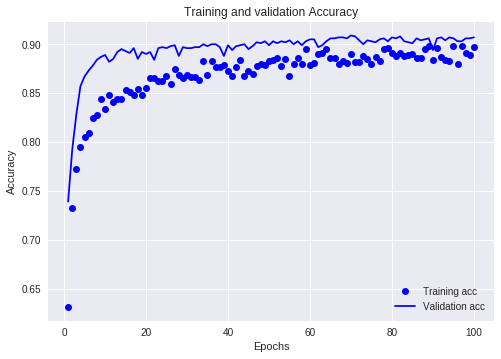

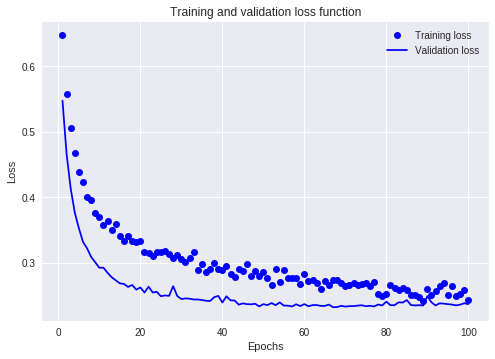

In [107]:
acc2 = history2.history['acc']
val_acc2 = history2.history['val_acc']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(1, len(acc2) + 1)

plt.plot(epochs2, acc2, 'bo', label='Training acc')
plt.plot(epochs2, val_acc2, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

As this plots are kind of noisy, I am trying to smooth them out.

In [0]:
def smoothCurve(points, factor=0.8):
  smoothedPoints = []
  for point in points:
    if smoothedPoints:
      previous = smoothedPoints[-1]
      smoothedPoints.append(previous * factor + point * (1 - factor))
    else:
      smoothedPoints.append(point)
  return smoothedPoints

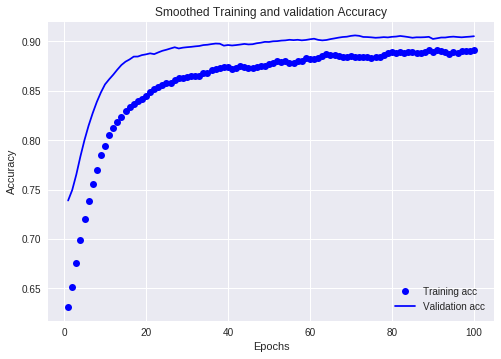

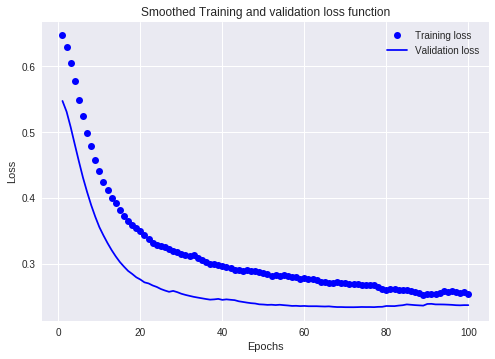

In [109]:
plt.plot(epochs2, smoothCurve(acc2), 'bo', label='Training acc')
plt.plot(epochs2, smoothCurve(val_acc2), 'b', label='Validation acc')
plt.title('Smoothed Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs2, smoothCurve(loss2), 'bo', label='Training loss')
plt.plot(epochs2, smoothCurve(val_loss2), 'b', label='Validation loss')
plt.title('Smoothed Training and validation loss function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [110]:
model2.evaluate_generator(testGen, steps=50)

[0.24014985702931882, 0.9]

## Visualizing convnets

In [0]:
cat_id = '1w_15bnFBysrucQzK9OSfsA6KjIW7xsO4'
cat_img = drive.CreateFile({'id':cat_id})
cat_img.GetContentFile('cat1700.jpg')

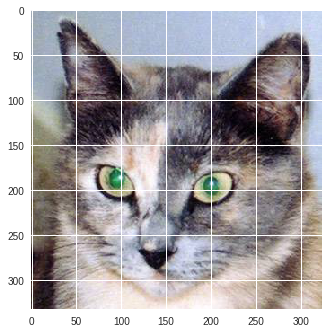

In [124]:
catEx = mpimg.imread('cat1700.jpg')
plt.imshow(catEx)

In [126]:
from keras.preprocessing import image
import numpy as np

imgTest = image.load_img('cat1700.jpg', target_size=(150,150))
imgTensor = image.img_to_array(imgTest)
imgTensor = np.expand_dims(imgTensor, axis=0)
imgTensor /= 255.
print(imgTensor.shape)

(1, 150, 150, 3)


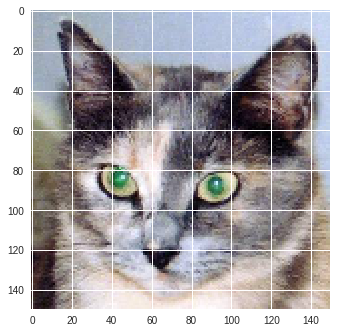

In [128]:
plt.imshow(imgTensor[0])
plt.show()